<a href="https://colab.research.google.com/github/domateus/CompSci-undergrad/blob/main/ai/Franceschina_202010019_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
cd drive/MyDrive/datasets

[Errno 2] No such file or directory: 'drive/MyDrive/datasets'
/content/drive/MyDrive/datasets


In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [220]:
data = pd.read_csv('titanic.csv')

In [221]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [222]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [224]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [225]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [226]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [227]:
data['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [228]:
drop_columns = ['PassengerId', 'Ticket', 'Name', 'Cabin']
categorical = ['Sex', 'Embarked']

In [229]:
data = data.drop(drop_columns, axis=1)

In [230]:
le = LabelEncoder()
data.Sex = le.fit_transform(data['Sex'])
data.Embarked = le.fit_transform(data['Embarked'])

In [231]:
data.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [232]:
data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [233]:
data.Age = data.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.mean()))

In [234]:
data.Age.isna().sum()

0

In [235]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [236]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.292875,0.523008,0.381594,32.204208,1.538721
std,0.486592,0.836071,0.477990,13.210527,1.102743,0.806057,49.693429,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [237]:
X = data.drop(['Survived'], axis=1)
y = data['Survived']

In [238]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [239]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [240]:
import seaborn as sns

In [241]:
#sns.pairplot(data)

In [242]:
X_train, X_test_30, y_train, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

In [243]:
X_validation, X_test, y_validation, y_test = train_test_split(X_test_30, y_test_30, test_size=0.65, random_state=42)

In [244]:
knn_control = KNeighborsClassifier(n_neighbors=3)
knn_control.fit(X_train, y_train)

#VALIDATION
print("VALIDATION")
knn_control.set_params(n_neighbors=14)
knn = knn_control
y_pred_knn = knn.predict(X_validation)
print(metrics.classification_report(y_pred_knn, y_validation))

#TEST
print("TEST")
y_pred_knn = knn.predict(X_test)
print(metrics.classification_report(y_pred_knn, y_test))

VALIDATION
              precision    recall  f1-score   support

           0       0.94      0.65      0.77        68
           1       0.48      0.88      0.62        25

    accuracy                           0.71        93
   macro avg       0.71      0.76      0.69        93
weighted avg       0.81      0.71      0.73        93

TEST
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       132
           1       0.45      0.67      0.54        43

    accuracy                           0.71       175
   macro avg       0.66      0.70      0.67       175
weighted avg       0.77      0.71      0.73       175



In [245]:
f_control = RandomForestClassifier(random_state=42)
f_control.fit(X_train, y_train)

#VALIDATION
print("VALIDATION")
f_control.set_params(n_estimators=20)
forest = f_control
yp_forest = forest.predict(X_validation)
print(metrics.classification_report(yp_forest, y_validation))

#TEST
print("TEST")
yp_forest = forest.predict(X_test)
print(metrics.classification_report(yp_forest, y_test))

VALIDATION
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        57
           1       0.74      0.94      0.83        36

    accuracy                           0.85        93
   macro avg       0.85      0.87      0.85        93
weighted avg       0.87      0.85      0.85        93

TEST
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       106
           1       0.69      0.65      0.67        69

    accuracy                           0.75       175
   macro avg       0.74      0.73      0.73       175
weighted avg       0.75      0.75      0.75       175



In [246]:
t_control = DecisionTreeClassifier()
t_control.fit(X_train, y_train)

#VALIDATION
t_control.set_params(max_depth=17)
print("VALIDATION")
tree = t_control
y_pred_tree = tree.predict(X_validation)
print(metrics.classification_report(y_pred_tree, y_validation))

#TEST
print("TEST")
y_pred_tree = tree.predict(X_test)
print(metrics.classification_report(y_pred_tree, y_test))

VALIDATION
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        57
           1       0.63      0.81      0.71        36

    accuracy                           0.74        93
   macro avg       0.74      0.75      0.74        93
weighted avg       0.77      0.74      0.75        93

TEST
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.72      0.63      0.67        75

    accuracy                           0.74       175
   macro avg       0.73      0.72      0.73       175
weighted avg       0.74      0.74      0.73       175



[Text(0.3358694129731076, 0.9772727272727273, 'x[1] <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]'),
 Text(0.1499003984063745, 0.9318181818181818, 'x[0] <= 2.5\ngini = 0.396\nsamples = 213\nvalue = [58, 155]'),
 Text(0.037848605577689244, 0.8863636363636364, 'x[2] <= 2.5\ngini = 0.07\nsamples = 110\nvalue = [4, 106]'),
 Text(0.01593625498007968, 0.8409090909090909, 'x[5] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.00796812749003984, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02390438247011952, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05976095617529881, 0.8409090909090909, 'x[5] <= 149.035\ngini = 0.054\nsamples = 108\nvalue = [3, 105]'),
 Text(0.0398406374501992, 0.7954545454545454, 'x[2] <= 49.5\ngini = 0.041\nsamples = 96\nvalue = [2, 94]'),
 Text(0.02390438247011952, 0.75, 'x[5] <= 22.0\ngini = 0.024\nsamples = 84\nvalue = [1, 83]'),
 Text(0.01593625498007968, 0.7045454545454546, 'x[5] <= 20.25\n

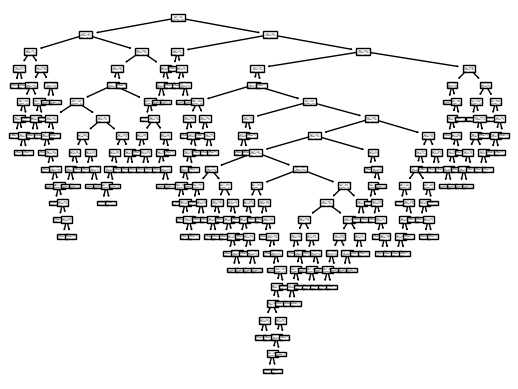

In [247]:
plot_tree(tree)

In [248]:
import graphviz
dot_data = export_graphviz(tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("titanic")

'titanic.pdf'

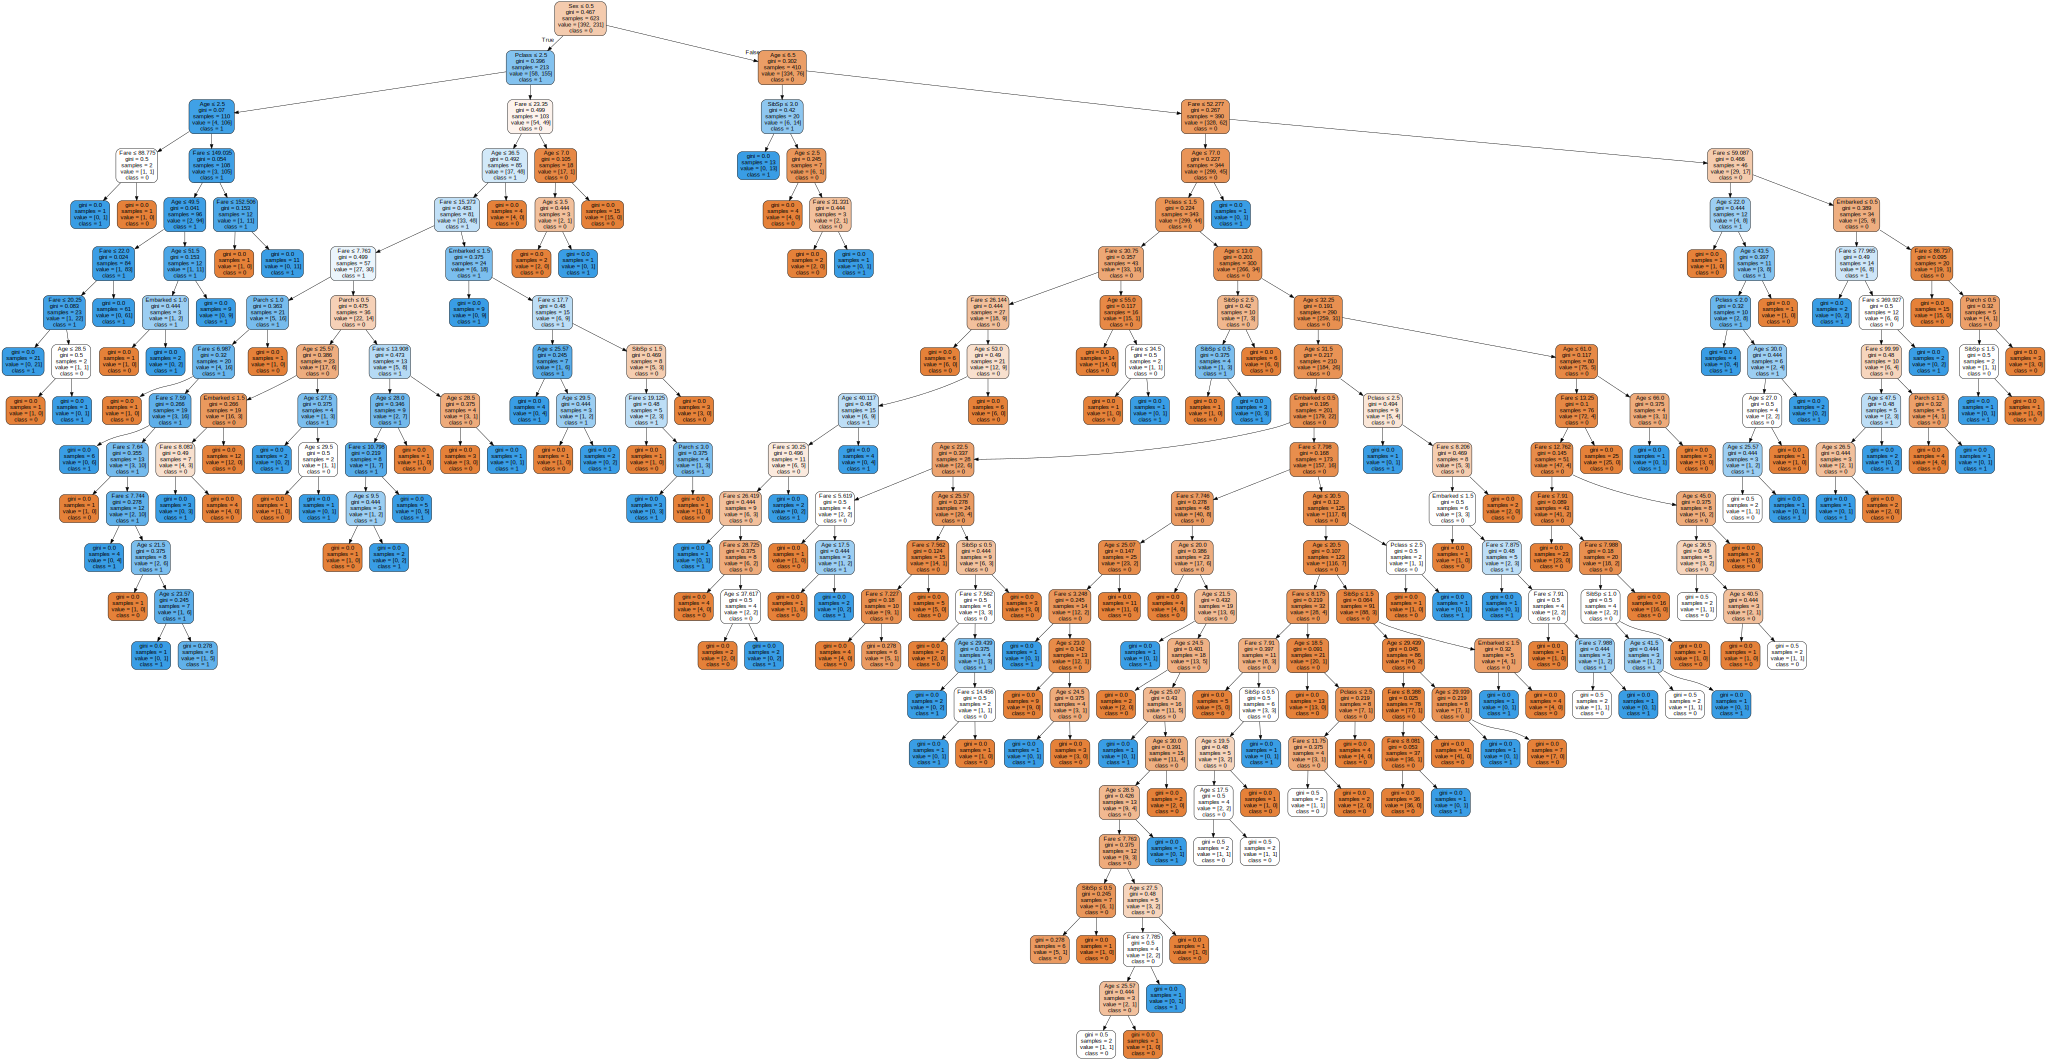

In [249]:
dot_data = export_graphviz(tree, out_file=None,
                      feature_names=X.columns,
                      class_names="01",
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Discussão
Todos os modelos foram capazes de prever se alguém sobreviveu ou não.
- KNN teve um desempenho consideravelmente pior que os outros
- DecisionTree mostrou-se bastante sensível a alterações nos parâmetros
    - A visualização da árvore apresentou valores inesperados para os totais, fontes sugerem ser devido ao uso de bootstrapping, mas nao achei nada sobre na documentação oficial
        1. [Why does this decision tree's values at each step not sum to the number of samples?](https://stackoverflow.com/questions/56103507/why-does-this-decision-trees-values-at-each-step-not-sum-to-the-number-of-sampl)
        2. [Why the sum "value" isn't equal to the number of "samples" in scikit-learn RandomForestClassifier?](https://stackoverflow.com/questions/71639534/why-the-sum-value-isnt-equal-to-the-number-of-samples-in-scikit-learn-rando)
        3. [Exemplo na documentacao onde a imagem mostra 112 amostras, apesar de 150 ser o total](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#tree-structure#:~:text=We%20can%20compare%20the%20above%20output%20to%20the%20plot%20of%20the%20decision%20tree)
-  RandomForest foi bastante resiliente a alterações de parâmetros, geralmente as métricas ficavam com variações pequenas de + ou -1 ponto

